<a href="https://colab.research.google.com/github/genc-ozge/genc-ozge.github.io/blob/main/MarketBasket_TicketSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Basket Analysis | Ticket Sales Data

The purpose of this study is to analyze ticket sales data from a cultural institution and employ market basket analysis to establish association rules between festivals and their corresponding venues. This study seeks to address the following issue: analyzing ticket sales data for a cultural institution that organizes festivals and one-time events throughout the year to define association rules between venues and festivals. These association rules can find applications in various direct marketing activities, such as providing event recommendations on websites, delivering personalized e-bulletins, and offering customized event suggestions on mobile applications. For instance, if an individual purchases a ticket for an event at a specific venue, they can receive a triggered email containing recommended events and venues based on the established association rules. Furthermore, the study aims to gain insights into audience behavior. The Python language is employed for data cleansing, algorithm application, and results presentation. Once the association rules are established, they can be leveraged in future recommendation projects.

## Data
The data consists of ticket sales transactions from a cultural institution.

The transactional data includes detailed information for each ticket sales transaction, including:

- Customer ID
- Purchase date and time
- Performance name
- Performance venue

The festivals and their corresponding venues are as follows:

- Festival F: A film festival with seven venues (Venue names: F1, F2, F3, ..., F7)
- Festival M: A music festival with eleven venues (Venue names: M1, M2, M3, ..., M11)
- Festival C: A jazz festival with fifteen venues (Venue names: C1, C2, ..., C15)
- Festival S: Concerts and special events with two venues (Venue names: S1, S2)

The original customer IDs have been replaced with sequential numbers from 1 to 23,739 for the purpose of this study. In the original data, certain transactions lack customer IDs due to the ticket holders being listed as anonymous. These transactions have been excluded from the study, and only transactions with valid customer IDs are considered.

## Pre-Processing for Apriori Algorithm

During the data cleaning stage, the following assumptions are taken into account, and the data is simplified and these transactions are excluded:

- return ticket transactions: It is assumed that all purchased tickets are not returned. While this assumption may not be entirely realistic, considering the limited timeframe of available transactions, it is impractical to identify all returned tickets accurately.
- exclusive events within the festivals.
- voucher transactions; only purchased tickets are considered.
- anonymous transactions: Transactions without a customer ID are omitted.

After finalizing the cleaning process, the dataset is used for subsequent pre-processing steps in implementing the apriori algorithm.

In [ ]:
!pip install apyori

#importing the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori



  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=8f05bcf616bb3d31fa0c59279b78259f782e583c60c05ab8149b9c1970f13391
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CustVenue.csv to CustVenue.csv
User uploaded file "CustVenue.csv" with length 1554118 bytes


In [ ]:
#Read File
myd = pd.read_csv('CustVenue.csv', sep=";")
myd.head()

,CustomerID,VenueID,EventName
0,1,M6,Festival M
1,1,M1,Festival M
2,1,M6,Festival M
3,1,M11,Festival M
4,2,M6,Festival M


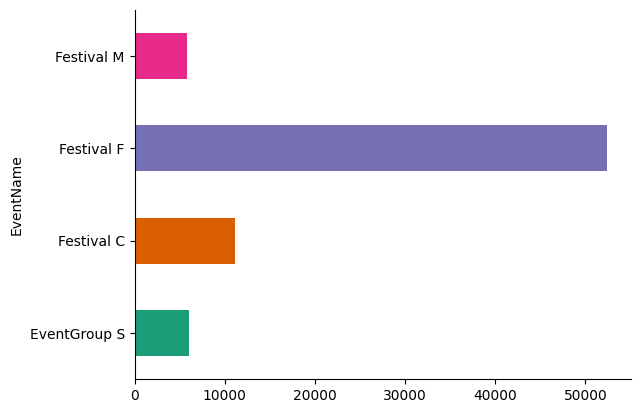

In [ ]:
# @title EventName

from matplotlib import pyplot as plt
import seaborn as sns
myd.groupby('EventName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(myd.VenueID.unique())
print(myd.CustomerID.unique())
print(myd.EventName.unique())

['M6', 'M1', 'M11', 'F1', 'F3', ..., 'M5', 'C9', 'C2', 'C15', 'C7']
Length: 35
Categories (35, object): ['C1', 'C10', 'C11', 'C12', ..., 'M8', 'M9', 'S1', 'S2']
[1, 2, 3, 4, 5, ..., 23735, 23736, 23737, 23738, 23739]
Length: 23614
Categories (23614, int64): [1, 2, 3, 4, ..., 23736, 23737, 23738, 23739]
['Festival M' 'Festival F' 'Festival C' 'EventGroup S']


In [ ]:
#changing the variable types to "category"

myd[['VenueID','CustomerID']] = myd[['VenueID','CustomerID']].astype('category')

In [ ]:
#dropping the duplicates and EventName column

myd=myd.drop_duplicates()
myd1 = myd.drop("EventName", axis=1)

In [ ]:
#creating nmyl list for Apriori algorithm

myl = myd1.values.tolist()
values = set(map(lambda x:x[0],myl))
nmyl = [[y[1] for y in myl if y[0] == x] for x in values]
len(nmyl)

23614

In [ ]:
#training Apriori algorithm

rules = apriori(nmyl, min_support=0.01, min_confidence=0.7, min_lift=3, min_length=2)

# The results
results = list(rules)
print(results)

[RelationRecord(items=frozenset({'F1', 'F2', 'F3'}), support=0.04772592529855171, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F2', 'F3'}), items_add=frozenset({'F1'}), confidence=0.820830298616169, lift=3.587467457250086)]), RelationRecord(items=frozenset({'F1', 'F2', 'F4'}), support=0.023164224612518, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F2', 'F4'}), items_add=frozenset({'F1'}), confidence=0.8794212218649518, lift=3.8435411314304964)]), RelationRecord(items=frozenset({'F1', 'F2', 'F5'}), support=0.027441348352672142, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F2', 'F5'}), items_add=frozenset({'F1'}), confidence=0.7641509433962265, lift=3.3397483578305556)]), RelationRecord(items=frozenset({'F1', 'F2', 'F6'}), support=0.019818751588040993, ordered_statistics=[OrderedStatistic(items_base=frozenset({'F6', 'F2'}), items_add=frozenset({'F1'}), confidence=0.8524590163934426, lift=3.725701871759162)]), RelationRecord(items=frozenset({'F

In [ ]:
#Since the results are mostly related to Festival F, we exclude Festival F
myd2 = myd[myd.EventName != 'Festival F']
print(myd2.VenueID.unique())

['M6', 'M1', 'M11', 'M4', 'M7', ..., 'M5', 'C9', 'C2', 'C15', 'C7']
Length: 28
Categories (35, object): ['C1', 'C10', 'C11', 'C12', ..., 'M8', 'M9', 'S1', 'S2']


In [ ]:
#dropping EventName column for myd2(without Festival F)
myd2 = myd2.drop("EventName", axis=1)

In [ ]:
#creating nmyl2 list for Apriori
myl2 = myd2.values.tolist()
values2 = set(map(lambda x:x[0], myl2))
nmyl2 = [[y[1] for y in myl2 if y[0]==x] for x in values2]
len(nmyl2)

14453

In [ ]:
#training nmyl2 Apriori
rules2 = apriori(nmyl2, min_support=0.005, min_confidence=0.7, min_lift=3, min_length=2)

In [ ]:
#the results
results2 = list(rules2)
print(results2)

[RelationRecord(items=frozenset({'M7', 'M1'}), support=0.011900643465024563, ordered_statistics=[OrderedStatistic(items_base=frozenset({'M7'}), items_add=frozenset({'M1'}), confidence=0.7078189300411523, lift=8.51090432269948)]), RelationRecord(items=frozenset({'C11', 'M6', 'M1'}), support=0.005604372794575521, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C11', 'M1'}), items_add=frozenset({'M6'}), confidence=0.7297297297297297, lift=7.4168662333219295)]), RelationRecord(items=frozenset({'M6', 'M1', 'M4'}), support=0.011554694527087801, ordered_statistics=[OrderedStatistic(items_base=frozenset({'M1', 'M4'}), items_add=frozenset({'M6'}), confidence=0.8067632850241545, lift=8.19982402141639), OrderedStatistic(items_base=frozenset({'M6', 'M4'}), items_add=frozenset({'M1'}), confidence=0.7660550458715596, lift=9.211142743745134)]), RelationRecord(items=frozenset({'M6', 'M5', 'M1'}), support=0.0059503217325122815, ordered_statistics=[OrderedStatistic(items_base=frozenset({'M6'

In [ ]:
#Apriori Algorithm only with EventNames
myd3 = myd.drop("VenueID", axis=1)
myd3 = myd3.drop_duplicates()

In [ ]:
#creating nmyl3 list for Apriori algorithm
myl3 = myd3.values.tolist()
values3 = set(map(lambda x:x[0], myl3))
nmyl3 = [[y[1] for y in myl3 if y[0]==x] for x in values3]
len(nmyl3)

23614

In [ ]:
#training nmyl3 for Apriori Algorithm
rules3 = apriori(nmyl3, min_support = 0.001, min_confidence=0.1, min_lift=2, min_length=2)

In [ ]:
# The Results
results3 = list(rules3)
print(results3)

[RelationRecord(items=frozenset({'Festival M', 'Festival C', 'Festival F'}), support=0.010502244431269585, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Festival M'}), items_add=frozenset({'Festival C', 'Festival F'}), confidence=0.10205761316872428, lift=2.792570657434826), OrderedStatistic(items_base=frozenset({'Festival C', 'Festival F'}), items_add=frozenset({'Festival M'}), confidence=0.28736964078794897, lift=2.792570657434826)]), RelationRecord(items=frozenset({'Festival M', 'Festival C', 'EventGroup S', 'Festival F'}), support=0.001185737274498179, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Festival M', 'EventGroup S'}), items_add=frozenset({'Festival C', 'Festival F'}), confidence=0.32941176470588235, lift=9.013591438893053), OrderedStatistic(items_base=frozenset({'Festival C', 'EventGroup S', 'Festival F'}), items_add=frozenset({'Festival M'}), confidence=0.21052631578947367, lift=2.045830625947585), OrderedStatistic(items_base=frozenset({'Festi

## Results

### Case 1

The associations are primarily observed among the Festival F venues. Among these venues, F1 has the highest frequency, making it one of the oldest, central, and popular locations within Festival F. Despite F5 and F7 not being in close proximity to the other Festival F venues, they still appear in the frequent item sets and rules. Notably, there are rules that include different event names, with C5, M1, and M6 being venues related to Festival F.


### Case 2


By excluding Festival F from the dataset, we observe that the rules mainly involve the Festival M venues. All Festival M venues, except M11, are situated in the European part of Istanbul and appear in the rules. However, M11 does not appear in any of the rules. Additionally, C11 is present in the rules along with M1 and M16.

### Case 3


When the festival venues variable is excluded, and only the event names are considered, the support, lift, and confidence values are lower compared to the previous implementations. The results reveal association rules between Festival F, Festival M, Festival C, and Event Group S.

These results provide valuable insights into the associations between festival venues and event names in different scenarios.

###Case 1: Venue Dynamics and Attendee Preferences
####Insights:
- The analysis reveals that F1 stands out as a focal point, attracting
significant attendee traffic due to its offerings, location, or size. This central role suggests F1's strategic importance in influencing festival navigation patterns.
- A discernible pathway emerges among attendees, indicating preferences for sequential or thematic venue exploration. This pattern offers an opportunity to enhance the attendee journey through curated venue circuits.

####Recommendations:

- Highlight F1 in Promotional Efforts: Leverage F1's prominence by featuring it in marketing campaigns, emphasizing its unique attractions to draw initial attendee interest.
- Curate Thematic Venue Circuits: Develop guided venue circuits that capitalize on the observed attendee pathways, enhancing engagement and exploration across the festival.
- Optimize Event Scheduling: Align event timings to encourage natural progression along the identified venue circuits, ensuring a seamless attendee experience.

###Case 2: Cultural and Musical Venue Synergy
####Insights:

- Strong ties between M1 and M7, as well as between M1 and cultural venues like
C11, highlight a multidimensional interest among attendees. This indicates a blend of musical and broader cultural engagement.
- M1 emerges as a central hub within Festival M, indicating its pivotal role in drawing and dispersing crowds to other venues.

####Recommendations:

- Implement Cross-Promotional Strategies: Capitalize on the synergy between musical and cultural venues by offering combined event packages or promotions that span across these interests.
- Emphasize M1's Central Role: Utilize M1's status as a hub in marketing materials, underscoring its array of offerings to attract and distribute attendees effectively.

###Case 3: Cross-Festival Interests and EventGroup S's Role

####Insights:

- Cross-festival interest among Festivals F, M, and C suggests a cohesive cultural fabric that binds these events together, with EventGroup S acting as a significant but niche connector among diverse festival-goers.
- This shared interest presents an opportunity for collaborative cross-festival promotions or packages that tap into the collective audience base.

####Recommendations:

- Develop Cross-Festival Passes: Offer passes that allow attendees access to multiple festivals at a reduced rate, encouraging exploration and attendance across the festival spectrum.
- Leverage EventGroup S as a Cultural Connector: Utilize EventGroup S's unique position to introduce its audience to a wider range of cultural experiences, potentially through targeted recommendations or exclusive events.
- Foster Community Engagement: Build platforms for discussion and interaction among festival-goers to deepen their connection to the festival themes and to each other, enhancing the overall cultural ecosystem.

###General Strategy:

- Enhance Marketing with Data-Driven Insights: Use the insights from the market basket analysis to tailor marketing strategies, highlighting the interconnectedness of venues and festivals.
- Personalize Audience Engagement: Develop personalized communication strategies based on previous attendance patterns, guiding attendees through the festival landscape in a manner that maximizes their cultural experience.
- Streamline Festival Logistics: Employ insights from venue associations to optimize festival layouts and scheduling, ensuring attendee convenience and satisfaction.